In [53]:
import urllib, json
%matplotlib inline

In [ ]:
url = "http://open.datapunt.amsterdam.nl/EtenDrinken.json"
response = urllib.urlopen(url)
data = json.loads(response.read())

In [3]:
data

[{u'dates': {u'enddate': u'', u'startdate': u'27-01-2011'},
  u'details': {u'de': {u'calendarsummary': u'Mo -Mi : 10:00 - 21:00 Uhr\nDo : 10:00 - 01:00 Uhr\nFr , Sa : 10:00 - 02:00 Uhr\nSo : 10:30 - 20:00 Uhr.',
    u'language': u'de',
    u'longdescription': u'',
    u'shortdescription': u'',
    u'title': u'Eetsalon van Dobben B.V.'},
   u'en': {u'calendarsummary': u'Mo -We : 10:00 - 21:00 hour\nTh : 10:00 - 01:00 hour\nFr , Sa : 10:00 - 02:00 hour\nSu: 10:30 - 20:00 hour.',
    u'language': u'en',
    u'longdescription': u'',
    u'shortdescription': u'This typical Amsterdam deluxe lunchroom is the meeting place of artists, soccer players and many other locals. Its Van Dobben croquette is famed far beyond the city limits.',
    u'title': u'Eetsalon van Dobben B.V.'},
   u'es': {u'calendarsummary': u'Lu -Mi : 10:00 - 21:00 Hora\nJu : 10:00 - 01:00 Hora\nVi , Sa : 10:00 - 02:00 Hora\nDo : 10:30 - 20:00 Hora.',
    u'language': u'es',
    u'longdescription': u'',
    u'shortdescription

In [4]:
eetgelegenheden = []

for d in data:
    naam = d['title']
    try:
        beschrijving = d['details']['nl']['shortdescription']
    except:
        beschrijving = "geen"
    lng = float(d['location']['longitude'].replace(',','.'))
    lat = float(d['location']['latitude'].replace(',','.'))    
    eetgelegenheden.append([naam, beschrijving, lng, lat])

In [5]:
eetgelegenheden

[[u'Eetsalon van Dobben B.V.',
  u'Deze typisch Amsterdamse luxe lunchroom is een pleisterplaats voor artiesten, voetballers en vele andere Amsterdammers. Tot ver buiten de stadsgrenzen is de Van Dobben croquet een begrip.',
  4.895306,
  52.366056],
 [u'Eetsalon van Dobben de Pijp',
  u'Deze typisch Amsterdamse luxe lunchroom is een pleisterplaats voor artiesten, voetballers en vele andere Amsterdammers.',
  4.890597,
  52.355583],
 [u'Cora Delicatessen & Broodjes',
  u'Cora biedt delicatessen, ontbijten en lunches op maat aan particulieren en bedrijven aan de grachtengordel van Amsterdam.',
  4.884494,
  52.365388],
 [u'Jonk Haringhandel',
  u'Voor een lekker harinkje en andere visspecialiteiten kun je terecht bij Jonk Haringhandel. Jonk is te vinden op het Spui, tegenover de Esprit Winkel.',
  4.890406,
  52.368836],
 [u'Vlaamsch Broodhuys', u'Vlaamsch Broodhuys', 4.87424, 52.363919],
 [u'Koffiehuis De Hoek',
  u'Waar anders dan in de Jordaan vind je het ras-Amsterdamse Koffiehuis D

In [6]:
import pandas as pd

data = pd.read_csv('PARKPLANTSOENGROEN.csv', sep=';')
data

,OBJECTNUMMER,Groen_ID,Stadsdeel,Naam,BBQ,Toelichting_bbq,Stadspark,Oppervlakte_m2,COORDS,LNG,LAT,Unnamed: 11
0,1,1,Nieuw-West,Gerbrandypark,RESTRICTIES,In het Gerbrandypark is barbecueën alleen in b...,N,71288,"POLYGON((4.826794 52.379047,4.826813 52.379006...","4,831153","52,3778535",NaN
1,2,2,Zuid,Park Schinkeleilanden,ONBEKEND,NaN,J,17901,"MULTIPOLYGON(((4.850506 52.34452,4.85053 52.34...","4,8506935","52,344822",NaN
2,3,3,Zuid,Amstelpark,VERBOD,In het Amstelpark mag u niet barbecueën.,J,437050,"MULTIPOLYGON(((4.890624 52.328765,4.890614 52....","4,894538","52,3292545",NaN
3,4,4,Zuid,`t Kleine Loopveld,ONBEKEND,NaN,N,165866,"MULTIPOLYGON(((4.892118 52.322563,4.892229 52....","4,87896","52,3230285",NaN
4,5,5,Zuid,Sarphatipark,VERBOD,In het Sarphatipark mag u niet barbecueën.,J,41922,"POLYGON((4.898562 52.354808,4.898948 52.354308...","4,8964085","52,3544025",NaN
5,6,6,Centrum,Frederiksplantsoen,VERBOD,In stadsdeel Centrum mag u niet barbecueën in ...,N,17504,"MULTIPOLYGON(((4.899879 52.360505,4.899802 52....","4,89963","52,3604295",NaN
6,7,7,Centrum,Weteringplantsoen,VERBOD,In stadsdeel Centrum mag u niet barbecueën in ...,N,15206,"MULTIPOLYGON(((4.888067 52.360373,4.888172 52....","4,890378","52,35943",NaN
7,8,8,Zuid,Vondelpark,VERBOD,Vanaf 1 maart 2017 is het niet meer toegestaan...,J,458776,"POLYGON((4.873905 52.35813,4.873282 52.357938,...","4,8685845","52,3579215",NaN
8,9,9,West,Erasmuspark,RESTRICTIES,Barbecueën in het Erasmuspark is toegestaan va...,J,107973,"POLYGON((4.854495 52.374386,4.854542 52.374246...","4,851728","52,3747215",NaN
9,10,10,West,Wachterliedplantsoen,VERBOD,In West mag u barbecueën op drie plaatsen: in ...,N,29278,"MULTIPOLYGON(((4.852433 52.37804,4.853931 52.3...","4,8528375","52,378727",NaN


In [38]:
parken = []

for _, row in data.iterrows():
    naam = row['Naam']
    lng = float(row['LNG'].replace(',','.'))
    lat = float(row['LAT'].replace(',','.'))  
    opp = row['Oppervlakte_m2']
    parken.append([naam, lng, lat, opp])
    
print parken

[['Gerbrandypark', 4.831153, 52.3778535, 71288], ['Park Schinkeleilanden', 4.8506935, 52.344822, 17901], ['Amstelpark', 4.894538, 52.3292545, 437050], ['`t Kleine Loopveld', 4.87896, 52.3230285, 165866], ['Sarphatipark', 4.8964085, 52.3544025, 41922], ['Frederiksplantsoen', 4.89963, 52.3604295, 17504], ['Weteringplantsoen', 4.890378, 52.35943, 15206], ['Vondelpark', 4.8685845, 52.3579215, 458776], ['Erasmuspark', 4.851728, 52.3747215, 107973], ['Wachterliedplantsoen', 4.8528375, 52.378727, 29278], ['Frederik Hendrikplantsoen', 4.8768585, 52.378971, 20578], ['Eerste Marnixplantsoen', 4.88048, 52.3816105, 6177], ['Stenenhoofd', 4.8926545, 52.3890475, 7948], ['Wertheimpark', 4.90861, 52.3678875, 7666], ['Oosterpark', 4.9202325, 52.3606245, 213187], ['Darwinplantsoen', 4.9307665, 52.3453275, 45246], ['Onderlangs', 4.945516, 52.339043, 52788], ['Noorder-IJplas', 4.866164, 52.423111, 548731], ['Wilmkebreekpolder', 4.903724, 52.4143335, 204356], ['Tolhuisweg', 4.904657, 52.383455, 15108], ['R

In [39]:
def vind_eetplek_dichtste_bij_park(parknaam):
    result = []
    lng, lat = 0, 0
    for p in parken:
        if p[0] == parknaam:
            lng, lat = p[1], p[2]
            break
            
    mindist = 1e9
    if lat != 0:
        for eetgelegenheid in eetgelegenheden:
            dlng = eetgelegenheid[2] - lng
            dlat = eetgelegenheid[3] - lat
            dlatlng = dlng*dlng + dlat*dlat
            if dlatlng < mindist:
                result = eetgelegenheid
                mindist = dlatlng
            
    return result
            
idee = vind_eetplek_dichtste_bij_park("Wertheimpark")

print "--------------------------------------------------------------------"
print "Als je naar het Wertheimpark gaat dan is eetgelegendheid %s vlakbij. Hier is wat ze zeggen over %s; \n\n%s" % (idee[0], idee[0], idee[1])
print "--------------------------------------------------------------------"       
            

--------------------------------------------------------------------
Als je naar het Wertheimpark gaat dan is eetgelegendheid Dignita Hoftuin vlakbij. Hier is wat ze zeggen over Dignita Hoftuin; 

Verborgen achter de Hermitage in Amsterdam ligt Dignita Hoftuin, een ongewoon tuincafé en een sociaal initiatief dat plaatselijk, biologisch eten serveert en tegelijk de gemeenschap steunt. 

--------------------------------------------------------------------


![title](img/wertheimpark.png)

In [59]:
def aantal_eetgelegendheden_rondom_park(parknaam, max_afstand):
    result = 0
    lng, lat = 0, 0
    for p in parken:
        if p[0] == parknaam:
            lng, lat = p[1], p[2]
            break
            
    if lat != 0:
        for eetgelegenheid in eetgelegenheden:
            dlng = eetgelegenheid[2] - lng
            dlat = eetgelegenheid[3] - lat
            dlatlng = dlng*dlng + dlat*dlat
            if dlatlng < max_afstand*max_afstand:
                result += 1
                
    return result


namen, opps, lngs, lats, eetgs = [], [], [], [], []
for p in parken:
    namen.append(p[0])
    opps.append(p[3])
    lngs.append(p[1])
    lats.append(p[2])
    eetgs.append(aantal_eetgelegendheden_rondom_park(p[0], 0.02))
    

#df = pd.DataFrame(index=naam, columns=['grootte', 'eetplekken'])
d = {'oppervlakte': opps, 'eetgelegenheden':eetgs, 'latitude':lats, 'longitude':lngs}
df = pd.DataFrame(data=d, index=namen)
df = df[df['oppervlakte']<1e6]
df

,eetgelegenheden,latitude,longitude,oppervlakte
Gerbrandypark,6,52.377854,4.831153,71288
Park Schinkeleilanden,21,52.344822,4.850694,17901
Amstelpark,18,52.329254,4.894538,437050
`t Kleine Loopveld,6,52.323028,4.878960,165866
Sarphatipark,288,52.354402,4.896408,41922
Frederiksplantsoen,347,52.360430,4.899630,17504
Weteringplantsoen,366,52.359430,4.890378,15206
Vondelpark,150,52.357922,4.868584,458776
Erasmuspark,38,52.374721,4.851728,107973
Wachterliedplantsoen,36,52.378727,4.852837,29278


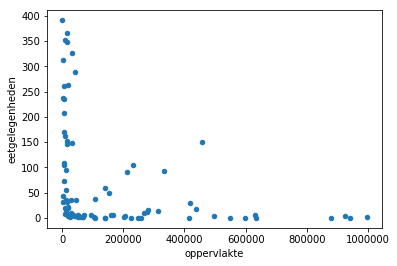

In [58]:
df.plot(kind='scatter', x='oppervlakte', y='eetgelegenheden');

In [73]:
centrum = [52.3693695,4.8986124]

df['afstand_tot_centrum'] = (df['latitude'] - centrum[0]) * (df['latitude'] - centrum[0]) + (df['longitude'] - centrum[1]) * (df['longitude'] - centrum[1]) 
df['afstand_tot_centrum'] *= 10000

In [74]:
df

,eetgelegenheden,latitude,longitude,oppervlakte,afstand_tot_centrum
Gerbrandypark,6,52.377854,4.831153,71288,46.227489
Park Schinkeleilanden,21,52.344822,4.850694,17901,28.988007
Amstelpark,18,52.329254,4.894538,437050,16.258140
`t Kleine Loopveld,6,52.323028,4.878960,165866,25.337051
Sarphatipark,288,52.354402,4.896408,41922,2.288683
Frederiksplantsoen,347,52.360430,4.899630,17504,0.809591
Weteringplantsoen,366,52.359430,4.890378,15206,1.665990
Vondelpark,150,52.357922,4.868584,458776,10.327315
Erasmuspark,38,52.374721,4.851728,107973,22.267909
Wachterliedplantsoen,36,52.378727,4.852837,29278,21.829043


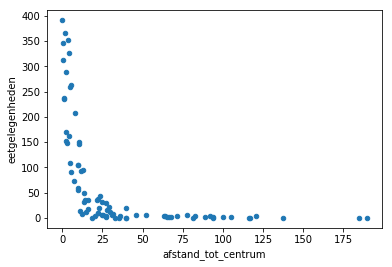

In [75]:
df.plot(kind='scatter', x='afstand_tot_centrum', y='eetgelegenheden');

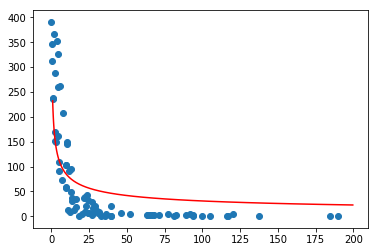

In [79]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(df['afstand_tot_centrum'])
y = np.array(df['eetgelegenheden'])

from scipy.optimize import curve_fit

def myExpFunc(x, a, b):
    return a * np.power(x, b)

popt, pcov = curve_fit(myExpFunc, X, y)

newX = np.logspace(0, 2.3, base=10)
plt.plot(newX, myExpFunc(newX, *popt), 'r-', 
         label="({0:.3f}*x**{1:.3f})".format(*popt))
plt.scatter(X,y)